## SciML LHS halfdata in tensorflow

In [21]:


import os

# Ensure the output folder exists
output_folder = 'model_train_images'
os.makedirs(output_folder, exist_ok=True)



import tensorflow as tf # is from google or facebooks (meta) pytorch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import matplotlib
matplotlib.rcParams['figure.dpi']=200 # highres display
plt.rcParams["figure.figsize"] = (20,3)
plt.rcParams.update({'font.size': 22})

import imageio
my_images = []

In [22]:


# Data Generation------

# Generating random data and add noise
# There will be ndata data points ranging from 0 to 50
ndata = 550
x = np.linspace(-50, 50, ndata)
 
# Adding noise to the random linear data
y=x**2/200 # + np.random.uniform(-4, 4, 550)#y**3/5000
  
n = len(x) # Number of data points
print(n)

# slice out a small number of points from the LHS of the domain
x_data = x[0:275:10]
y_data = y[0:275:10]
print(x_data.shape, y_data.shape)

#to check amount of data in Sliced out portion

lhs_percentage = (x_data.shape[0] / ndata) * 100
print(f"Percentage of LHS Sliced Data: {lhs_percentage:.2f}%")


550
(28,) (28,)
Percentage of LHS Sliced Data: 5.09%


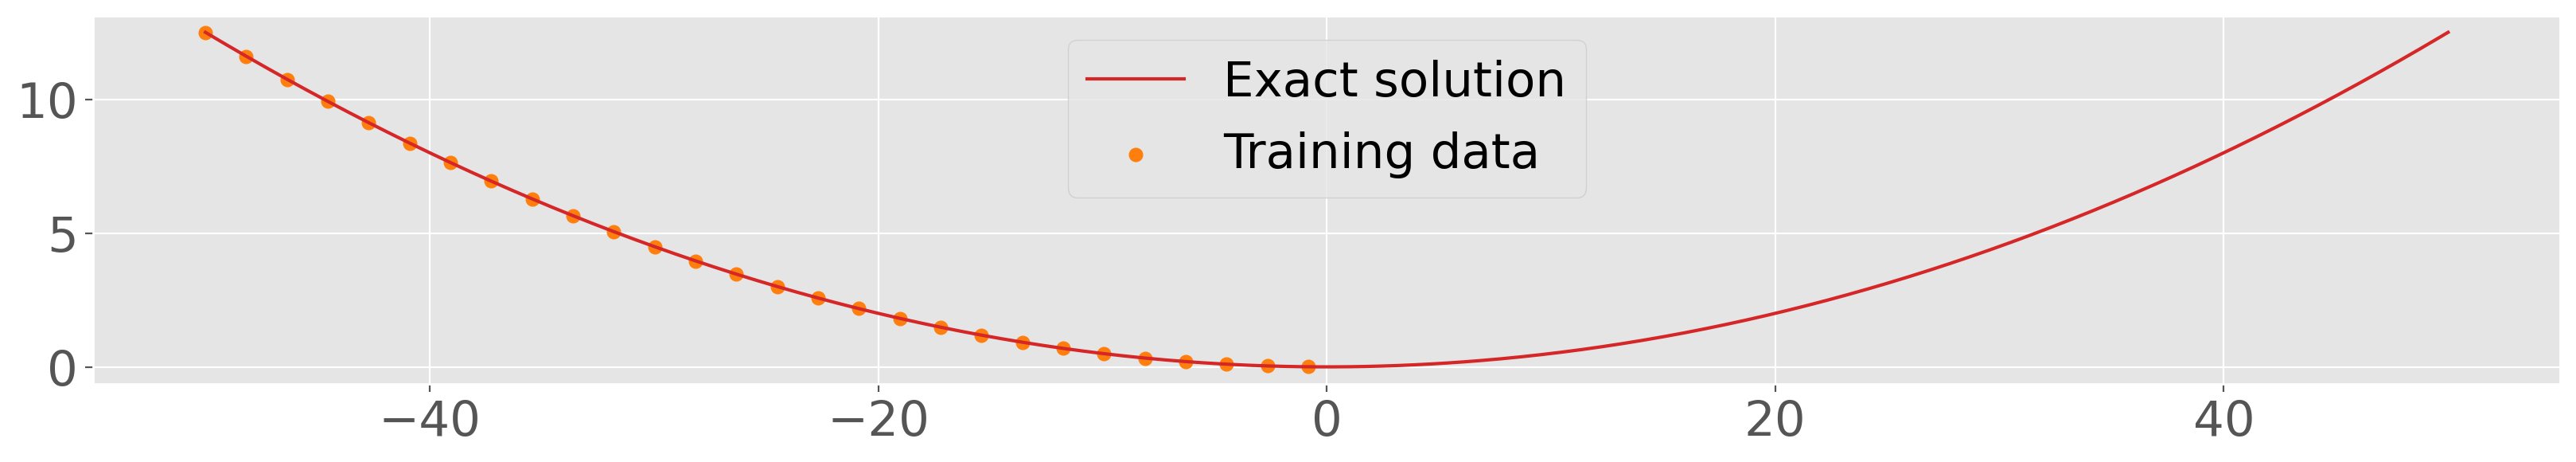

In [23]:
plt.figure()
plt.plot(x, x**2/200, color="tab:red", label="Exact solution")
# plt.scatter(x, y, color="tab:blue", label="Collected data")
plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
plt.legend()
plt.show()

In [24]:
#36
#to visualize model performance on test data 

class PerformancePlotCallback(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test,x,count, model_name):
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x
   
    def on_epoch_end(self, epoch, logs={}):
        
        if epoch % 10 ==0:
            self.count=self.count+1
            y_pred = self.model.predict(self.x_test)
            
            # Print the number of test data points
            #print("Number of test data points:", len(self.x_test))
            
            fig, ax = plt.subplots(figsize=(8,4))
            plt.scatter(self.x_test, y_pred, alpha=0.6, 
                color='#FF0000', lw=1, ec='black')
            
            plt.scatter(self.x_test, self.y_test, alpha=0.1, 
                color='blue', lw=1, ec='black')

            lims = [-50, 50]

            #plt.plot(lims, lims, lw=1, color='#0000FF')
            plt.plot(self.x, self.x**2/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim(lims)
            plt.ylim([-5,20])
            plt.xlabel('x')
            plt.ylabel('$x^2/200$')
            
            

            plt.tight_layout()
            plt.title(f'Prediction Visualization - Epoch: {epoch}',fontsize=18)
            plt.savefig('model_train_images/'+self.model_name+"_"+str(self.count))
            
            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)
            plt.close()

In [25]:
#37
#visualize model performance on whole x data 

class PerformancePlotCallbackn(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test,x,count, model_name):
        self.x_test = x_test
        self.y_test = y_test
        self.count = count
        self.model_name = model_name
        self.x = x
   
    def on_epoch_end(self, epoch, logs={}):
        
        if epoch % 10 ==0:
            self.count=self.count+1
            y_pred = self.model.predict(self.x)
            
            fig, ax = plt.subplots(figsize=(8,4))
            plt.scatter(self.x, y_pred, alpha=0.6, 
                color='#FF0000', lw=1, ec='black')
            
            plt.scatter(self.x_test, self.y_test, alpha=0.1, 
                color='blue', lw=1, ec='black')

            lims = [-50, 50]

            #plt.plot(lims, lims, lw=1, color='#0000FF')
            plt.plot(self.x, self.x**2/200, lw=1, color='#0000FF')
            plt.ticklabel_format(useOffset=False, style='plain')
            plt.xticks(fontsize=18)
            plt.yticks(fontsize=18)
            plt.xlim(lims)
            plt.ylim([-5,20])
            
            plt.xlabel('x')
            plt.ylabel('$x^2/200$')
            
            

            plt.tight_layout()
            plt.title(f'Prediction Visualization  - Epoch: {epoch}',fontsize=18)
#             plt.savefig('model_train_images/'+self.model_name+"_"+str(self.count))
            
            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)
            plt.close()

In [26]:
from tensorflow.keras.utils import plot_model



#38
import imageio
my_images = []
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(32, input_shape=[1]))
model1.add(tf.keras.layers.Dense(1))
model1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model1.summary()
plot_model(model1, 'model.png', show_shapes=True)


# callback
performance = PerformancePlotCallback(x_data, y_data,x,0, "RegressionQ")
history = model1.fit(x_data, y_data, epochs=500,callbacks=[performance])


# save images as a gif     
imageio.mimsave('./para1.gif', my_images, fps=10)



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                64        
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 63.5571
Epoch 2/500
1/1 [==============================] - 0s 0s/step - loss: 17.0640
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 2.2962
Epoch 4/500
1/1 [==============

18/18 [==============================] - 0s 2ms/step


[None, None, None, None, None, None]

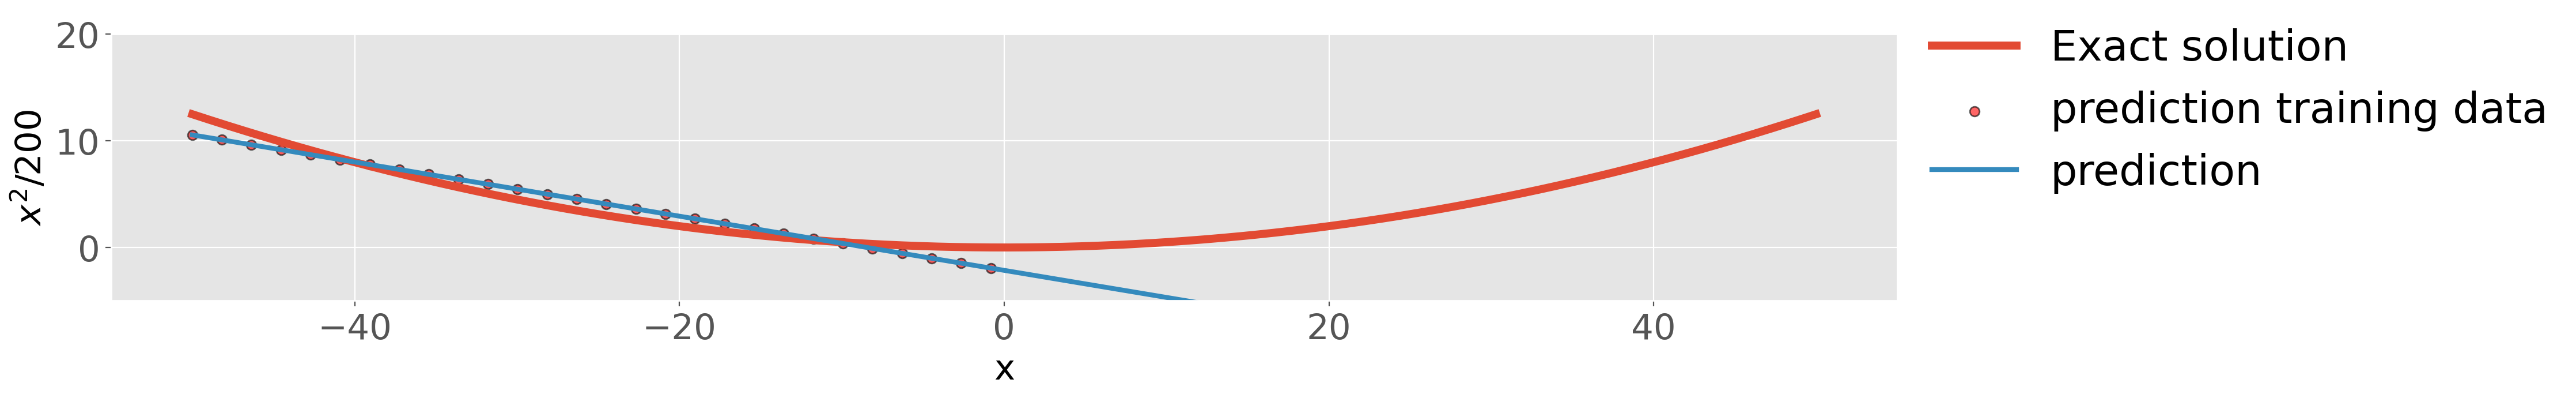

In [27]:
#45
plt.figure()
# x_test = x[0:550:5]
# y_test = y[0:550:5]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model1.predict(x_data), alpha=0.6, 
                color='#FF0000', lw=1, ec='black',label="prediction training data")
            
plt.plot(x, model1.predict(x), lw=3,label="prediction")
plt.ylim([-5,20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')
l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

In [28]:
#50

import imageio
my_images = []
# slice out a small number of points from the LHS of the domain
x_data = x[0:275:10]
y_data = y[0:275:10]
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(132,  activation='relu'))
model2.add(tf.keras.layers.Dense(1))
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2.summary()
# callback
performance = PerformancePlotCallbackn(x_data, y_data,x,0, "RegressionQ")
history = model2.fit(x_data, y_data, epochs=600,batch_size=32,callbacks=[performance])
# save images as a gif    
imageio.mimsave('./para3.gif', my_images, fps=10)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 132)               264       
                                                                 
 dense_15 (Dense)            (None, 132)               17556     
                                                                 
 dense_16 (Dense)            (None, 132)               17556     
                                                                 
 dense_17 (Dense)            (None, 1)                 133       
                                                                 
Total params: 35509 (138.71 KB)
Trainable params: 35509 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/600
1/1 [==============================] - 2s 2s/step - loss: 107.6506
Epoch 2/600
1/1 [==============================] - 0s 7ms/step - loss

18/18 [==============================] - 0s 2ms/step


[None, None, None, None, None, None]

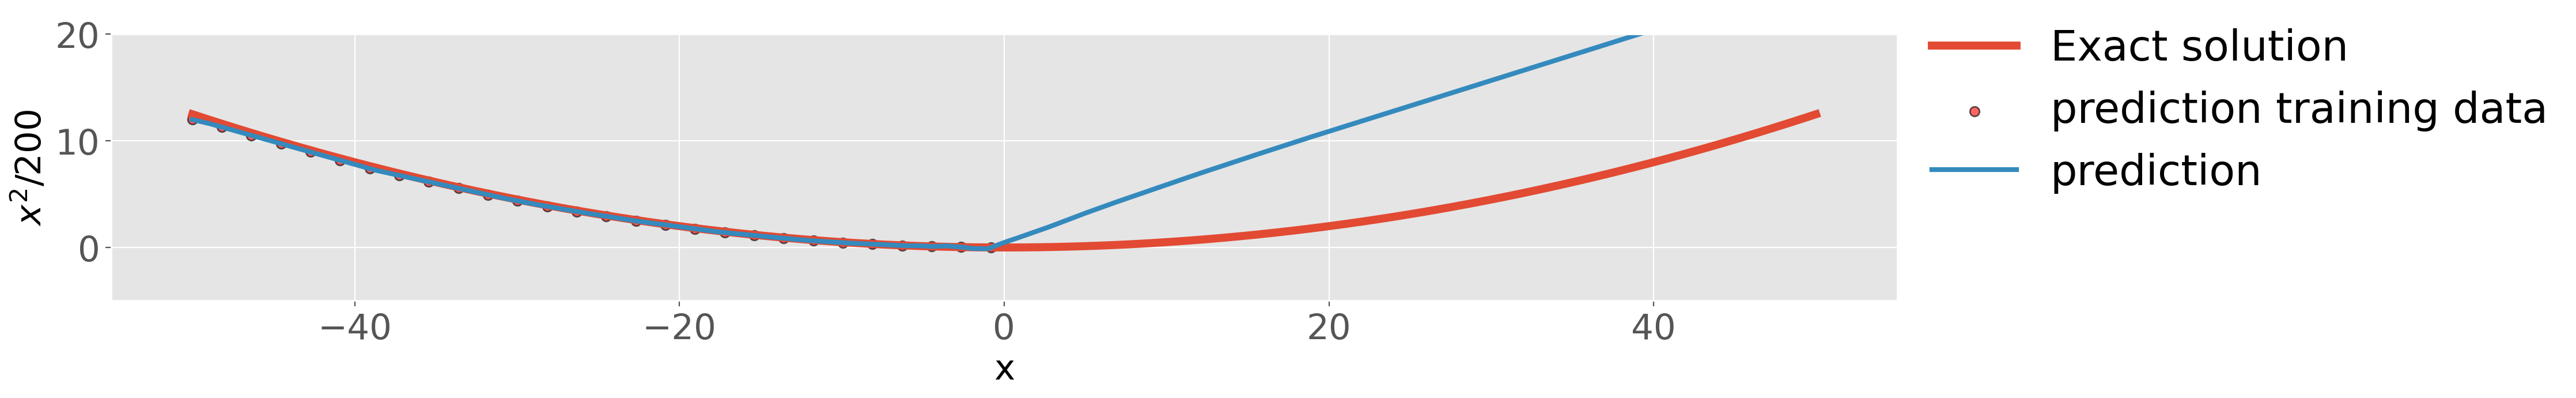

In [29]:
#53
plt.figure()
x_data = x[0:275:10]
y_data = y[0:275:10]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2.predict(x_data), alpha=0.6, 
                color='#FF0000', lw=1, ec='black',label="prediction training data")
            
plt.plot(x, model2.predict(x), lw=3,label="prediction")
plt.ylim([-5,20])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")

In [30]:
import imageio
my_images = []
# slice out a small number of points from the LHS of the domain
x_data = x[0:275:10]
y_data = y[0:275:10]
model2d = tf.keras.Sequential()
model2d.add(tf.keras.layers.Dense(132, input_shape=[1]))
model2d.add(tf.keras.layers.Dense(132,  activation='relu'))
model2d.add(tf.keras.layers.Dense(132,  activation='relu'))
model2d.add(tf.keras.layers.Dense(1))
model2d.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(1e-2))
model2d.summary()
# callback
performance = PerformancePlotCallbackn(x_data, y_data,x,0, "RegressionQ")
history = model2d.fit(x_data, y_data, epochs=600,batch_size=32,callbacks=[performance])
# save images as a gif    
imageio.mimsave('./para2.gif', my_images, fps=10)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 132)               264       
                                                                 
 dense_19 (Dense)            (None, 132)               17556     
                                                                 
 dense_20 (Dense)            (None, 132)               17556     
                                                                 
 dense_21 (Dense)            (None, 1)                 133       
                                                                 
Total params: 35509 (138.71 KB)
Trainable params: 35509 (138.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/600
1/1 [==============================] - 2s 2s/step - loss: 19.9744
Epoch 2/600
1/1 [==============================] - 0s 6ms/step - loss:

18/18 [==============================] - 0s 2ms/step


[None, None, None, None, None, None]

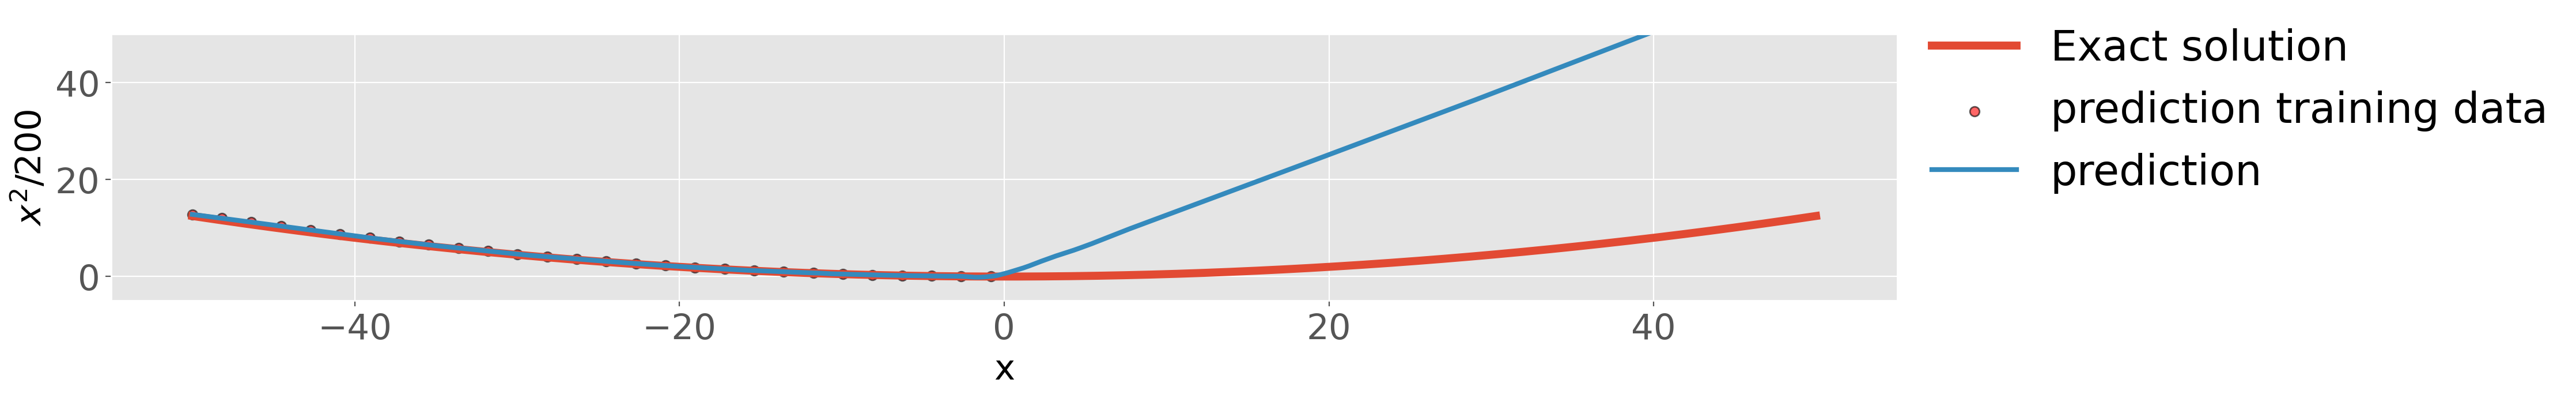

In [31]:
#48
plt.figure()
x_data = x[0:275:10]
y_data = y[0:275:10]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2d.predict(x_data), alpha=0.6, 
                color='#FF0000', lw=1, ec='black',label="prediction training data")
            
plt.plot(x, model2d.predict(x), lw=3,label="prediction")
plt.ylim([-5,50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")





18/18 [==============================] - 0s 3ms/step


[None, None, None, None, None, None]

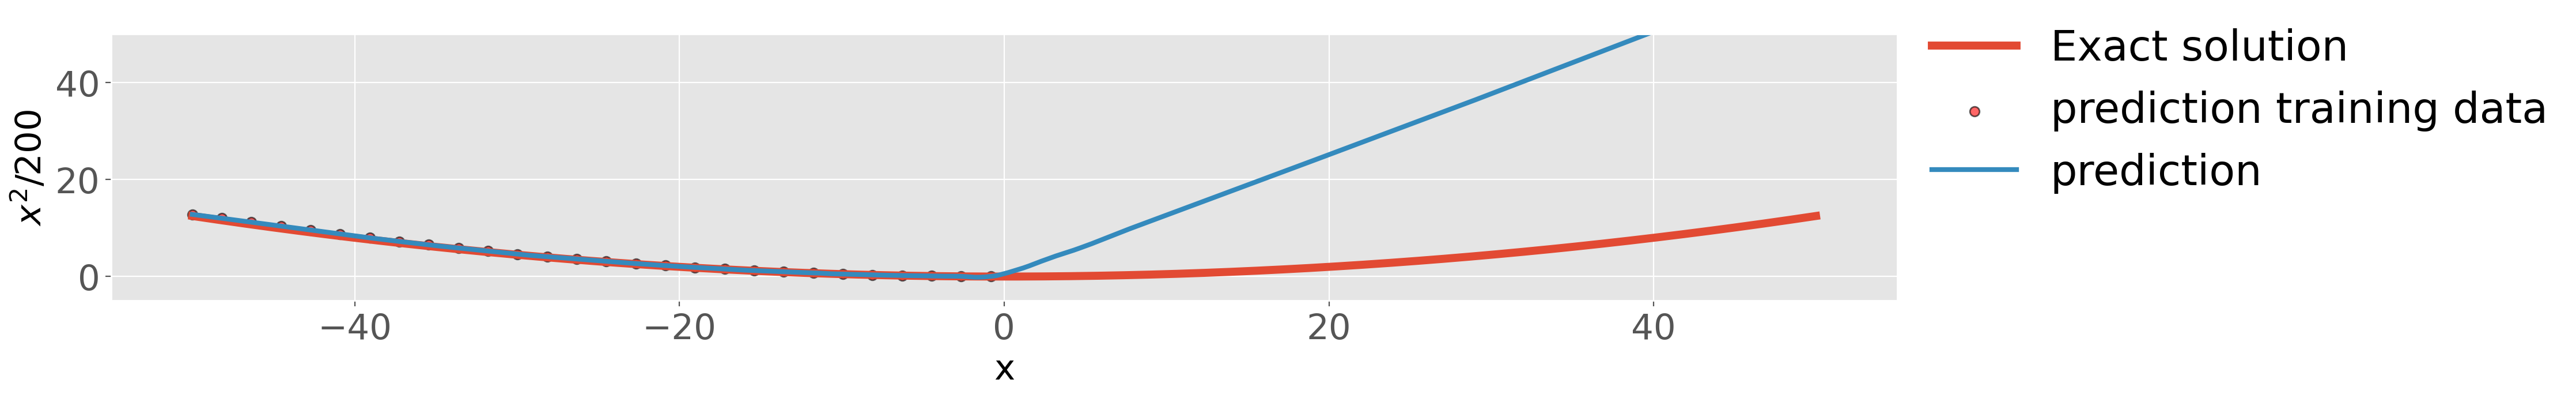

In [32]:
#48
plt.figure()
x_data = x[0:275:10]
y_data = y[0:275:10]
plt.plot(x,x**2/200,lw=5,label="Exact solution")
plt.scatter(x_data, model2d.predict(x_data), alpha=0.6, 
                color='#FF0000', lw=1, ec='black',label="prediction training data")
            
plt.plot(x, model2d.predict(x), lw=3,label="prediction")
plt.ylim([-5,50])
plt.xlabel('x')
plt.ylabel('$x^2/200$')

l = plt.legend(loc=(1.01,0.34), frameon=False, fontsize="large")
plt.setp(l.get_texts(), color="k")
